In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Car Sale.csv')

# Display the first few rows
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
#Q1-What is the average selling price of cars for each dealer, and how does it compare across different dealers
print(df.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


💰 Average Selling Price per Dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095

<ipython-input-4-6b3dc45666b2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values, palette='viridis')


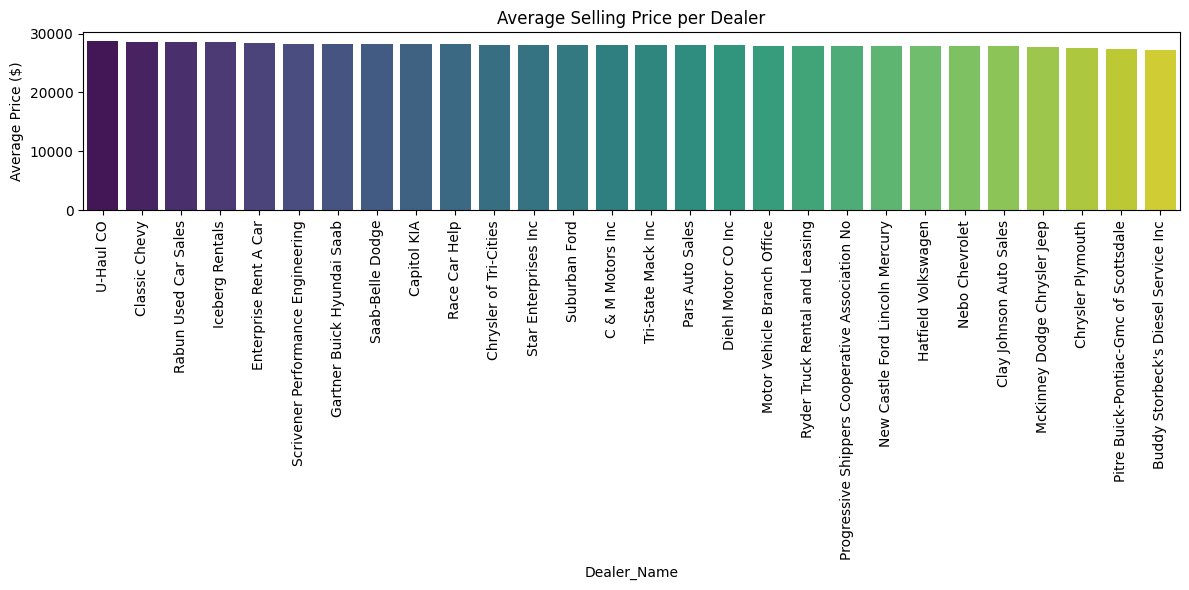

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (if not already loaded)
df = pd.read_csv('/content/drive/MyDrive/Car Sale.csv')

# Ensure 'Price ($)' is numeric
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Calculate average selling price per dealer
avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# Display the average prices
print("💰 Average Selling Price per Dealer:")
print(avg_price_per_dealer)

# Visualize with a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel("Average Price ($)")
plt.title("Average Selling Price per Dealer")
plt.tight_layout()
plt.show()


In [5]:
#Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

# Ensure 'Price ($)' is numeric
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Group by company and calculate standard deviation of price
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Display the company with the highest price variation
print("🚘 Company with the highest variation in car prices:")
print(price_variation.head(1))

# Display full variation table (optional)
print("\n📊 Price Variation per Company:")
print(price_variation)


🚘 Company with the highest variation in car prices:
Company
Lincoln    19658.050211
Name: Price ($), dtype: float64

📊 Price Variation per Company:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


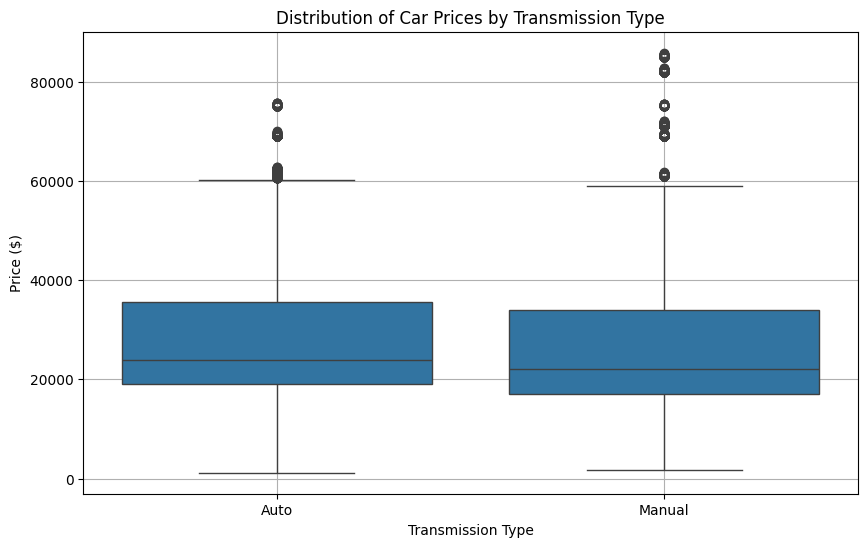

📊 Interquartile Range (IQR) of car prices by transmission type:
Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [6]:
#Q3  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare



# Ensure 'Price ($)' is numeric
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Drop missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Transmission'])

# Boxplot to visualize price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.ylabel('Price ($)')
plt.xlabel('Transmission Type')
plt.grid(True)
plt.show()

# Calculate IQR for each transmission type
iqr_comparison = df.groupby('Transmission')['Price ($)'].agg(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("📊 Interquartile Range (IQR) of car prices by transmission type:")
print(iqr_comparison)


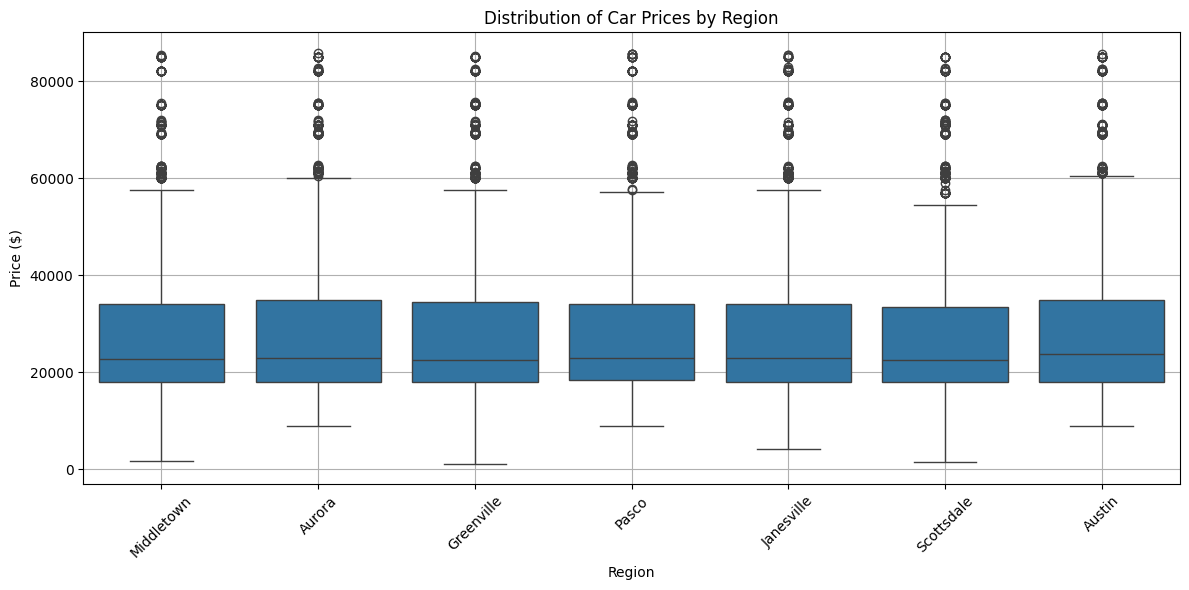

In [7]:
#Q4 What is the distribution of car prices across different regions


# Ensure 'Price ($)' is numeric
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Price ($)', 'Dealer_Region'])

# Plot boxplot for price distribution across regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


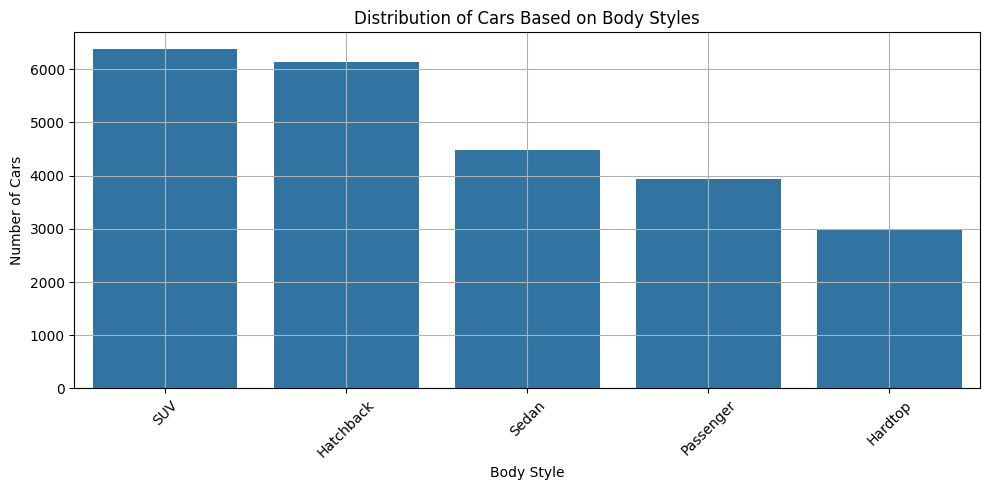

In [9]:
#Q5 What is the distribution of cars based on body styles

# Drop rows with missing body style values
df = df.dropna(subset=['Body Style'])

# Plot the count of each body style
plt.figure(figsize=(10, 5))
sns.countplot(x='Body Style', data=df, order=df['Body Style'].value_counts().index)
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


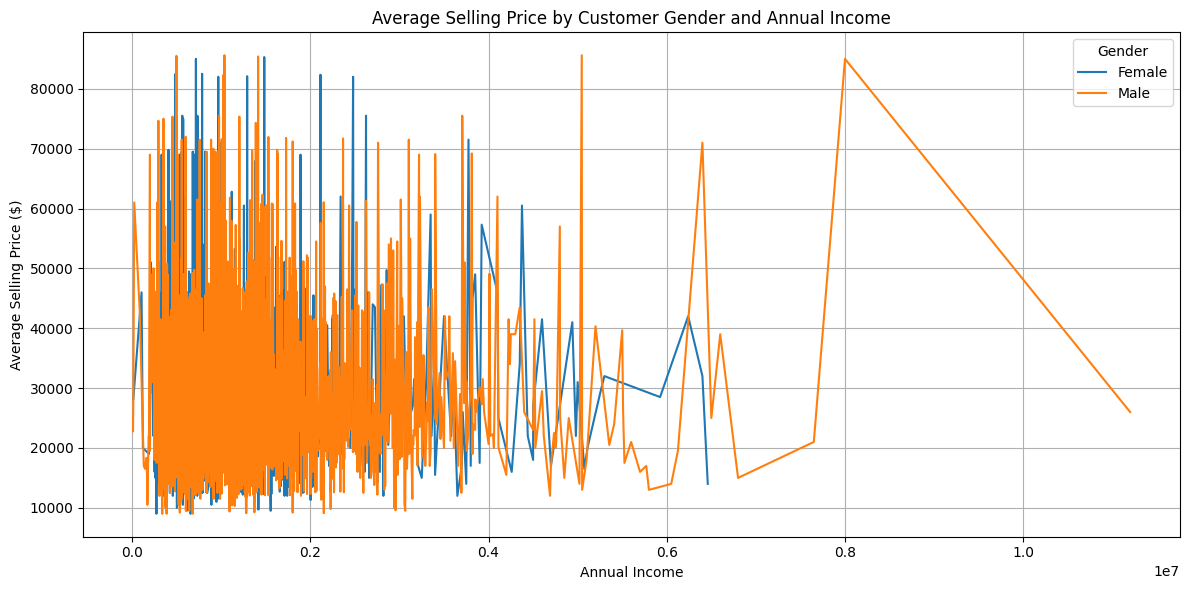

In [10]:
#Q6 How does the average selling price of cars vary by customer gender and annual income


# Group the data by 'Gender' and 'Annual Income' and calculate the average 'Price ($)'
avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='Annual Income', y='Price ($)', hue='Gender', data=avg_price_by_gender_income)
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


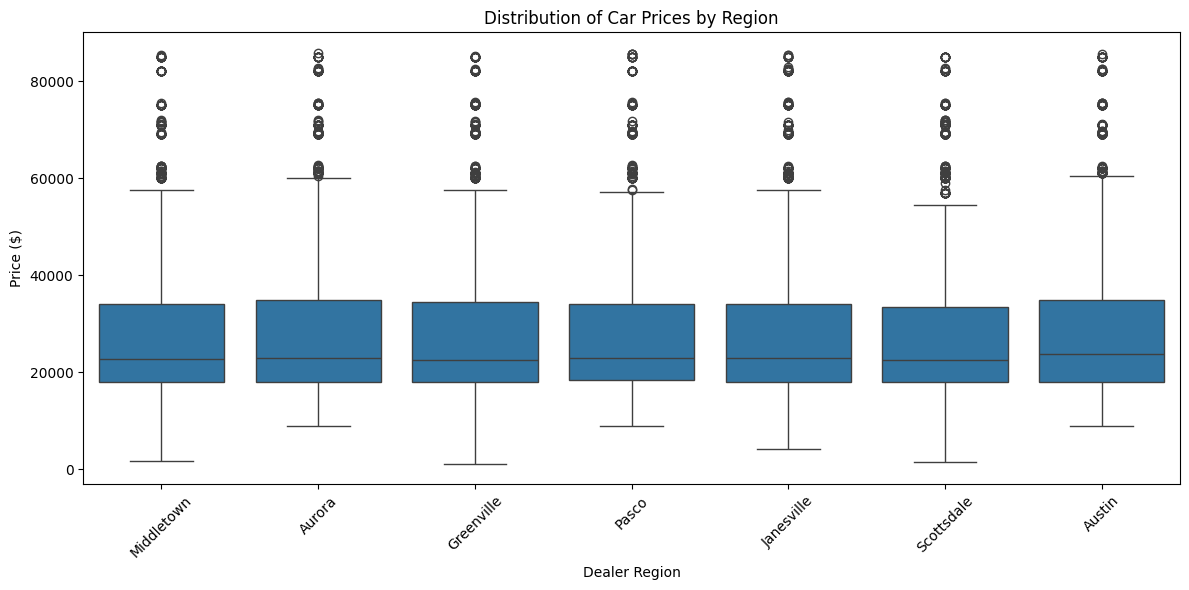

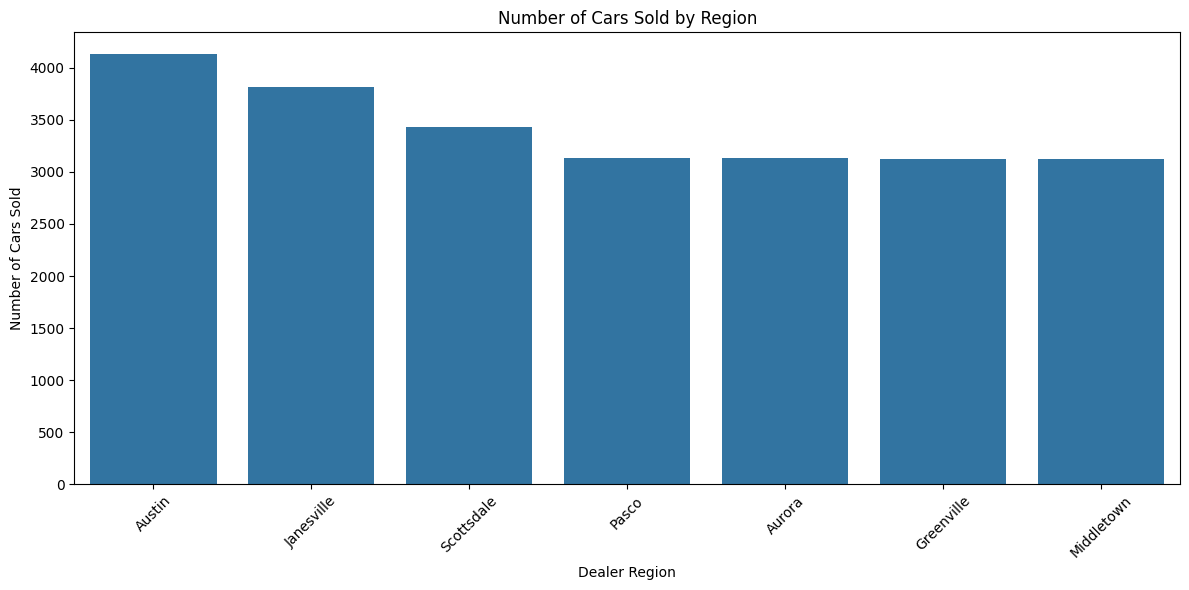

In [11]:
#Q7 What is the distribution of car prices by region, and how does the number of cars sold vary by region


# Distribution of car prices by region (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of cars sold by region (bar chart)
cars_sold_by_region = df['Dealer_Region'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-12-124a49d0c9f4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine, palette='viridis')


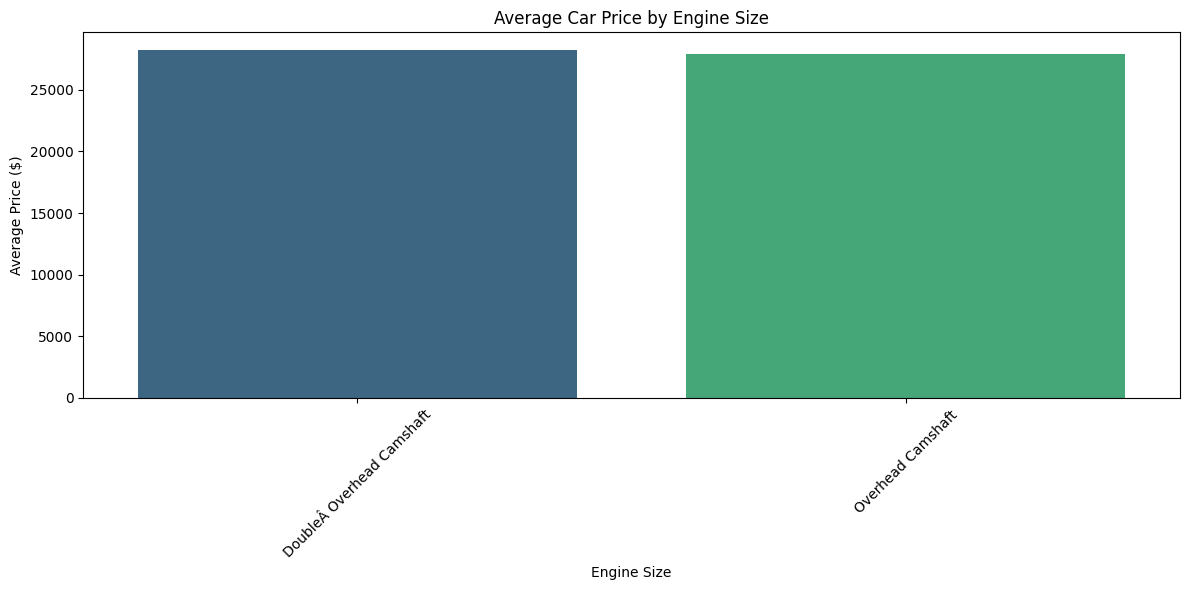

In [12]:
#Q8 How does the average car price differ between cars with different engine sizes

# Calculate the average price for each engine size
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()

# Sort values to have a better view
avg_price_by_engine = avg_price_by_engine.sort_values('Price ($)', ascending=False)

# Plot the average car price by engine size
plt.figure(figsize=(12, 6))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine, palette='viridis')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-13-694e39b0bd3e>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean().reset_index()
<ipython-input-13-694e39b0bd3e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Bracket', y='Price ($)', data=avg_price_by_income, palette='coolwarm')


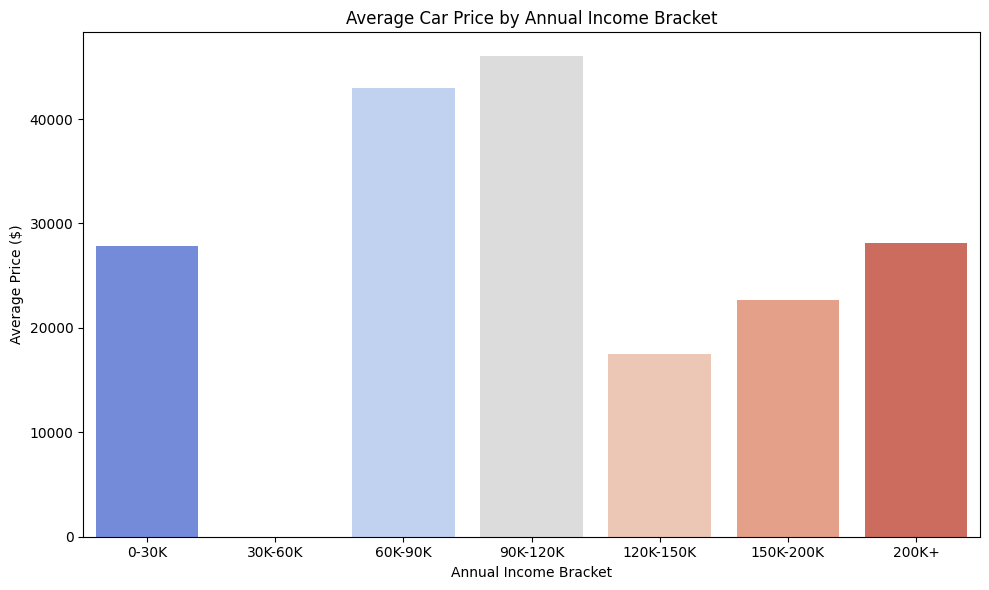

In [13]:
#Q9 How do car prices vary based on the customer’s annual income bracket


# Define income brackets
income_bins = [0, 30000, 60000, 90000, 120000, 150000, 200000, float('inf')]
income_labels = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K-200K', '200K+']

# Add a new column for income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Calculate the average price for each income bracket
avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean().reset_index()

# Plot the average car price by income bracket
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Bracket', y='Price ($)', data=avg_price_by_income, palette='coolwarm')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()


In [ ]:
#Q10 What are the top 5 car models with the highest number of sales, and how does their price distribution look


# Step 1: Count the number of sales per car model
sales_by_model = df['Model'].value_counts().reset_index()
sales_by_model.columns = ['Model', 'Sales Count']

# Step 2: Get the top 5 car models with the highest number of sales
top_5_models = sales_by_model.head(5)

# Step 3: Filter the original dataframe for these top 5 models
top_5_models_data = df[df['Model'].isin(top_5_models['Model'])]

# Step 4: Plot the price distribution for the top 5 models
plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_data, palette='coolwarm')
plt.title('Price Distribution for the Top 5 Car Models with the Highest Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


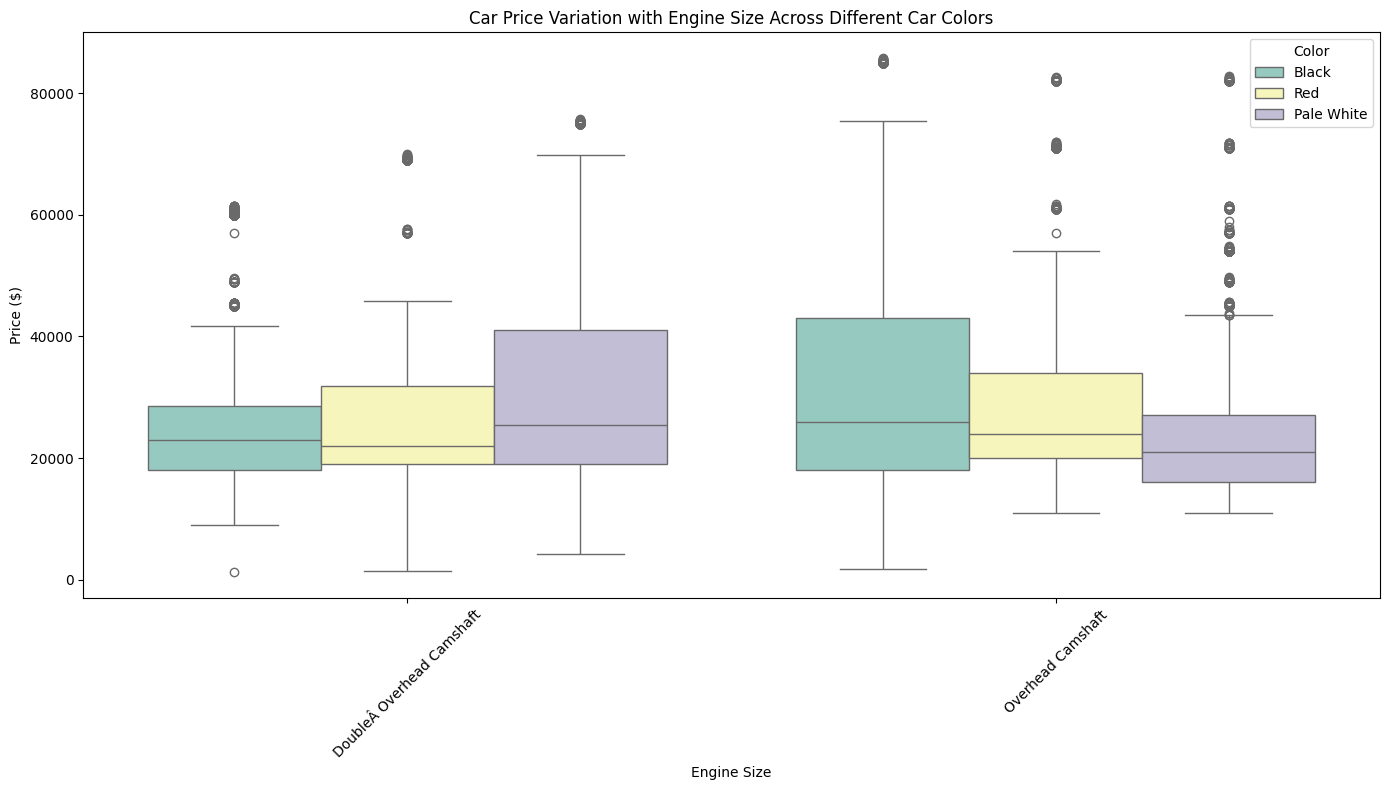

Colors with the highest price variation:
        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [14]:
#Q11 How does car price vary with engine size across different car colors, and which colors have the highest price variation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Plot the price variation with respect to engine size and car color
plt.figure(figsize=(14, 8))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df, palette='Set3')
plt.title('Car Price Variation with Engine Size Across Different Car Colors')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Calculate price variation (standard deviation) for each car color
price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color = price_variation_by_color.sort_values(by='Price ($)', ascending=False)

# Step 4: Display the colors with the highest price variation
print("Colors with the highest price variation:")
print(price_variation_by_color.head())



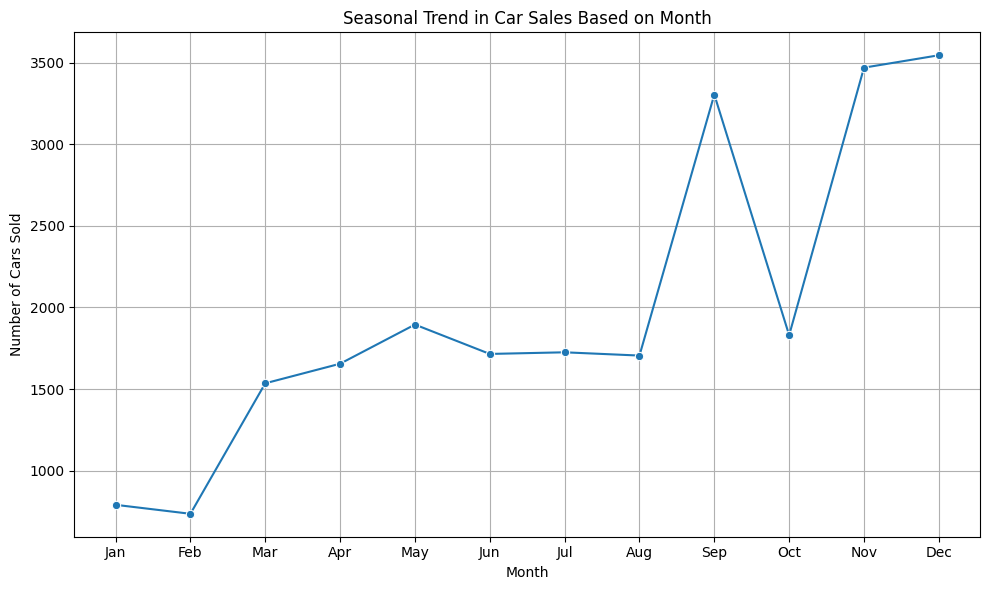

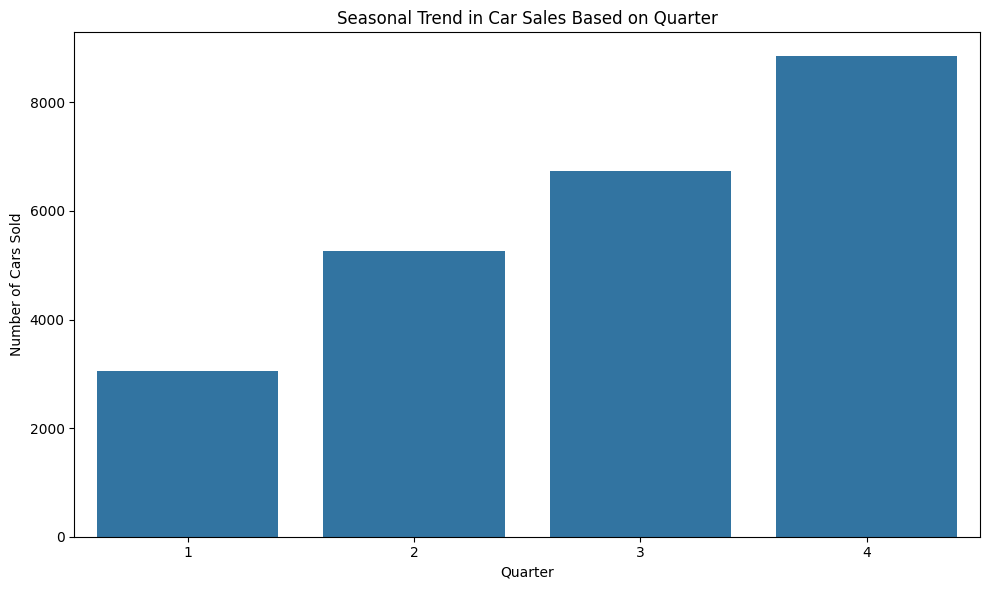

In [15]:
#Q12 Is there any seasonal trend in car sales based on the date of sale


# Step 1: Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Extract the month and quarter from the Date column
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Step 3: Group by month and calculate the total number of cars sold (or average price if needed)
sales_by_month = df.groupby('Month').size().reset_index(name='Sales Count')

# Step 4: Plot the seasonal trend by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales Count', data=sales_by_month, marker='o')
plt.title('Seasonal Trend in Car Sales Based on Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: You can also observe trends by quarter if that's relevant
sales_by_quarter = df.groupby('Quarter').size().reset_index(name='Sales Count')

# Plotting the seasonal trend by quarter
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Sales Count', data=sales_by_quarter)
plt.title('Seasonal Trend in Car Sales Based on Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()


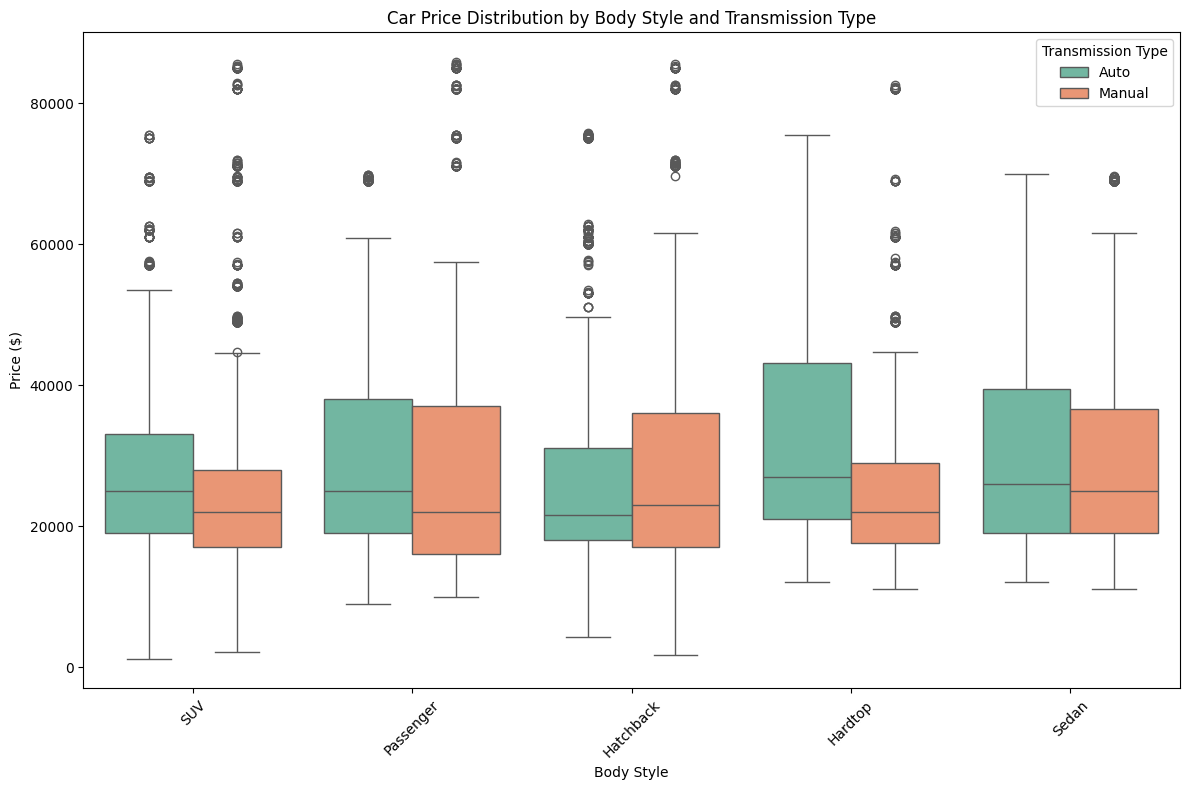

In [16]:
#Q13 How does the car price distribution change when considering different combinations of body style and transmission type


# Step 1: Group the data by body style and transmission type
# Step 2: Visualize the price distribution using a box plot or violin plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette="Set2")

# Adding title and labels
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()



               Price ($)  Engine  Annual Income
Price ($)            NaN     NaN            NaN
Engine               NaN     NaN            NaN
Annual Income        NaN     NaN            NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


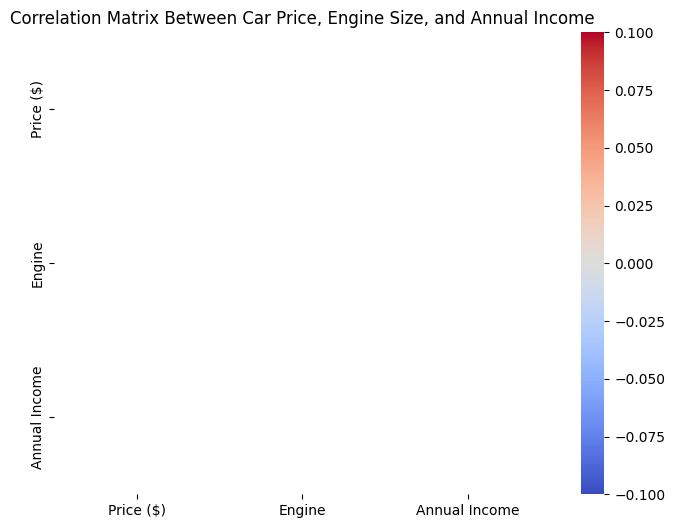

In [20]:
#Q14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact


# Step 1: Ensure the relevant columns are numeric
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# Step 2: Handle missing values by dropping rows with NaN values in the relevant columns
correlation_data = df[['Price ($)', 'Engine', 'Annual Income']].dropna()

# Step 3: Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 4: Display the correlation matrix
print(correlation_matrix)

# Step 5: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Between Car Price, Engine Size, and Annual Income")
plt.show()



In [18]:
#Q15 How does the average car price vary across different car models and engine types

# Step 1: Group the data by 'Model' and 'Engine', and calculate the average price for each combination
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Step 2: Display the result
print(avg_price_by_model_engine)

# Optional: To visualize this using a pivot table for better clarity
pivot_table = avg_price_by_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')

# Display the pivot table
print(pivot_table)


        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287      